In [1]:
## K-MEANS CLUSTERING test script 
#PLAN: cluster datapoints based on various numerical variables, 
# then visualise & overlay readmittance status on each datapoint,
#see if clusters overlap

#
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

myfile1='cleaned_diabetic_data.csv'
df=pd.read_csv(myfile1)
df.loc[1]

# CREATE OBJECTS W/ numerical column list 
col_heads=list(df.columns)
catlist= df.select_dtypes(object).columns.values.tolist()
numlist= df.select_dtypes(np.number).columns.values.tolist()

for col in numlist:
    if col[-2:]=='id':
        numlist.remove(col)
        catlist.append(col)
numlist.remove('patient_nbr')
numlist.remove('discharge_disposition_id')
#print('numerical columns are: {}\ncategorical columns are: {}'.format(numlist,catlist))

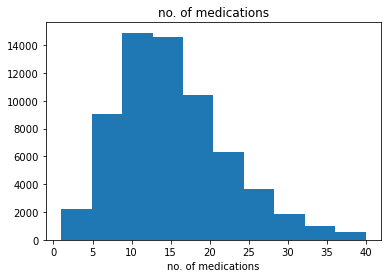

<Figure size 432x288 with 0 Axes>

In [2]:
# show various histograms of potential clusters 
plt.hist(df['num_medications']) #choose variable to plot, etc. 
plt.xlabel('no. of medications') 
plt.title('no. of medications')
plt.show()
plt.clf()

In [3]:
df.groupby('num_medications').mean()

,encounter_id,patient_nbr,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,number_outpatient,number_emergency,number_inpatient,number_diagnoses
num_medications,,,,,,,,,,,,,
1,1.376663e+08,5.079309e+07,62.864583,2.020833,3.442708,5.406250,2.104167,31.760417,0.453125,0.088542,0.026042,0.026042,5.807292
2,1.527077e+08,5.165244e+07,62.492711,1.827988,2.492711,5.734694,1.868805,34.658892,0.568513,0.090379,0.058309,0.052478,5.670554
3,1.440942e+08,5.010474e+07,61.481481,1.938272,2.918210,5.719136,2.168210,34.203704,0.612654,0.094136,0.033951,0.041667,5.651235
4,1.445035e+08,5.134140e+07,62.581262,1.880497,2.878585,5.652008,2.299235,34.605163,0.673040,0.117591,0.044933,0.048757,5.850860
5,1.496965e+08,5.148621e+07,62.957938,1.953867,3.090231,5.893487,2.371099,35.284939,0.629579,0.097693,0.036635,0.059701,6.062415
6,1.487843e+08,5.170338e+07,64.340771,1.903651,3.228702,5.674949,2.596856,36.145030,0.724138,0.127282,0.048682,0.058824,6.201318
7,1.459160e+08,5.165293e+07,64.948228,1.897650,3.209478,5.810036,2.816408,36.146555,0.747511,0.119873,0.046993,0.055356,6.389885
8,1.445655e+08,5.271265e+07,65.847236,1.944390,3.358521,5.780504,2.895976,38.059863,0.871770,0.157344,0.046451,0.065751,6.620216
9,1.479260e+08,5.314080e+07,65.800000,1.971095,3.149489,5.827737,3.073869,38.103066,0.916788,0.131679,0.047007,0.067737,6.734599


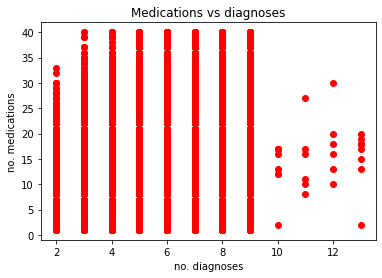

In [4]:
## scatter plot of 2 
plt.plot(df['number_diagnoses'], df['num_medications'],'ro')
plt.title('Medications vs diagnoses')
plt.xlabel('no. diagnoses') 
plt.ylabel('no. medications')
plt.show()

In [5]:
# normalisation -- DOES THIS WORK? FIND SIMPLER SCRIPT 
df_norm=df.copy()
for x in numlist: 
    if x in df.columns:
        df_norm[x]= (df[x]-df[x].min()) / (df[x].max()-df[x].min())
df_norm.loc[1]

#remove categorical values from df, and also patient numbers/ids 
for x in catlist:
    if x in df_norm.columns:
        df_norm.drop(labels=x,axis=1, inplace=True)
df_norm.drop(labels=['patient_nbr', 'discharge_disposition_id'],axis=1,inplace=True)

In [6]:
### model building 
#call algorithm with 6 clusters 
model = KMeans(n_clusters=6)
model.fit(df_norm)


cost= 13899.025247012336


In [7]:
print('cost=',model.inertia_) # J score (lower = better)
#j score = sum of square distances between each point + its centroid 
print(model.labels_) #labels denoting clusters for each 

cost= 13899.025247012336
[2 0 0 ... 4 4 3]


In [10]:
#add cluster assignments to df with below script 
labels=model.labels_
md=pd.Series(labels)
df['clust']=md
df_norm['clust']=md


,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted,clust
0,64410,86047875,AfricanAmerican,Female,25,1,1,7,2,NaN,...,No,Steady,No,No,No,No,No,Yes,NO,2
1,500364,82442376,Caucasian,Male,35,1,1,7,2,NaN,...,No,No,No,No,No,Up,Ch,Yes,NO,0
2,16680,42519267,Caucasian,Male,45,1,1,7,1,NaN,...,No,Steady,No,No,No,Steady,Ch,Yes,NO,0
3,35754,82637451,Caucasian,Male,55,2,1,2,3,NaN,...,No,No,No,No,No,Steady,No,Yes,>30,3
4,55842,84259809,Caucasian,Male,65,3,1,2,4,NaN,...,Steady,No,No,No,No,Steady,Ch,Yes,NO,1


In [14]:
# means of data points for each cluster 
df_norm.groupby('clust').mean()
# see the mean of each column for each cluster 
#(e.g. 1 has a mean normalised age of 0.63 - tend to be slightly older, etc.)

,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
clust,,,,,,,,,
0,0.362738,0.144995,0.366765,0.108554,0.276825,0.034023,0.0,0.000000,0.355484
1,0.637609,0.576723,0.537769,0.221212,0.512148,0.042558,0.0,0.000000,0.555940
2,0.617380,0.304204,0.443705,0.221919,0.384836,0.078633,0.0,1.000000,0.508092
3,0.567231,0.248812,0.396882,0.731272,0.438671,0.043027,0.0,0.000000,0.486474
4,0.578284,0.258319,0.413786,0.200237,0.371689,0.126580,1.0,0.172986,0.514272
5,0.740935,0.172028,0.370461,0.081333,0.298030,0.068015,0.0,0.000000,0.501742


centroids:  [[ 3.62688100e-01  1.44960755e-01  3.66817936e-01  1.08568036e-01
   2.76794880e-01  3.39907218e-02  3.95516953e-16  2.77555756e-16
   3.55445491e-01]
 [ 6.37704384e-01  5.76174191e-01  5.37608863e-01  2.20793434e-01
   5.11821998e-01  4.25900593e-02 -8.67361738e-16  1.91513472e-15
   5.55983916e-01]
 [ 6.17380104e-01  3.04204236e-01  4.43705117e-01  2.21919340e-01
   3.84835825e-01  7.86328371e-02 -6.93889390e-18  1.00000000e+00
   5.08092034e-01]
 [ 5.67273428e-01  2.48988732e-01  3.96995088e-01  7.31323638e-01
   4.38784305e-01  4.30190375e-02 -1.02695630e-15  1.72084569e-15
   4.86503288e-01]
 [ 5.78283683e-01  2.58318523e-01  4.13785721e-01  2.00236967e-01
   3.71688541e-01  1.26579779e-01  1.00000000e+00  1.72985782e-01
   5.14271866e-01]
 [ 7.40940749e-01  1.71780896e-01  3.70251757e-01  8.13061472e-02
   2.97906427e-01  6.80495273e-02  1.20736754e-15 -1.76247905e-15
   5.01633372e-01]]


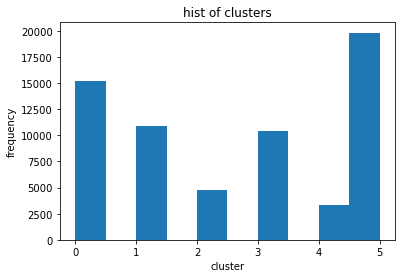

In [11]:
#cluster centroids 
centroids=model.cluster_centers_
print('centroids: ', centroids) 
#histogram of clusters 
plt.hist(df_norm['clust'])
plt.title('hist of clusters')
plt.xlabel('cluster')
plt.ylabel('frequency')
plt.show()


Plotting elbow method...
2 71077.47456521154
4 26858.87839330251
6 13899.015009242912
8 12720.916643491428
10 11859.760105278807
12 11077.964624079286
14 10548.103438663087
16 9901.820200208018
18 9607.220051870889


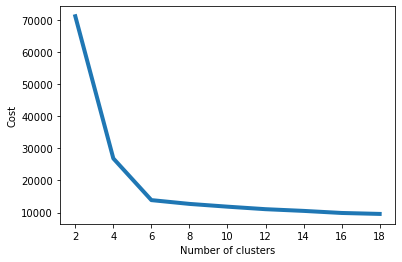

DONE


In [12]:
#make elbow plot - for determining / supporting K value decision 
#identify 'joint' in elbow that informs on optimal cluster no. 
def elbow(data):
    print("\nPlotting elbow method...")
    sse = {}
    for k in range(2, 20, 2):
        kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data)
        print(k, kmeans.inertia_)
        sse[k] = kmeans.inertia_  
        # Inertia: Sum of distances of samples to their closest cluster center
    plt.figure()
    plt.plot(list(sse.keys()), list(sse.values()), linewidth=4)
    plt.xlabel("Number of clusters")
    plt.ylabel("Cost")
    plt.show()
    print("DONE")
elbow(df_norm) 

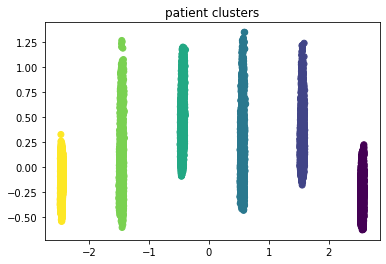

In [13]:
######## 2D plot of the clusters
pca_data = PCA(n_components=2).fit(df_norm)
pca_2d = pca_data.transform(df_norm)
plt.scatter(pca_2d[:,0], pca_2d[:,1], c=labels)
plt.title('patient clusters')
plt.show()